## Preparation

##### Import Functions

In [1]:
import numpy as np
import pandas as pd
from os import listdir
from skimage import io
from matplotlib import pyplot as plt
from skimage.draw import circle, circle_perimeter
from skimage.color import rgb2hsv, rgb2hed, hed2rgb, rgb2gray
from Scripts.LoadImage import LoadImage as LoadImage
from Scripts.Fuzzify import Fuzzify as Fuzzify
from Class.Helper import Helper as Helper
from Scripts.Ki67 import Ki67 as Ki67
import pickle

##### Functions

In [2]:
from skimage.morphology import binary_closing
from skimage.morphology import disk, remove_small_objects
from skimage.color import rgb2gray
from skimage.color import gray2rgb
from skimage import data, io, segmentation, color
import math
import pandas as pd
from skimage import img_as_uint
from skimage.transform import rescale
from skimage import img_as_ubyte
def getRecall(markers, mask):
    radius = 3
    hits = markers.apply(lambda marker: mask[int(marker['y'])-radius:int(marker['y']) + radius + 1, int(marker['x'])-radius:int(marker['x']) + radius + 1].any(),axis=1)
    recall = hits.sum() / len(hits)
    return recall

def validateResults(folder_name, show_images = False):
    path = settings.data_folder_test
    mask = pickle.load(open(settings.backup_folder + "Images/" + "Test_" + folder_name + "_" + settings.class_1 + "_df_results"  + ".p", "rb"))
    mask = mask.sort_index()
    
    file_path = path + folder_name
    base = io.imread(file_path + "/base.png")
    markers = pd.read_csv(file_path + "/markers.csv")
    
    if settings.class_1 == "brown":
        searched_class = 1
    else:
        searched_class = 2
    try:
        width = math.floor(base.shape[1] / 3)
        mask = np.reshape(np.array(mask["Decision Fuzzy"]), (-1, width))
    except:
        width = math.ceil(base.shape[1] / 3)
        mask = np.reshape(np.array(mask["Decision Fuzzy"]), (-1, width))       
        
    mask = [np.ones(3) if j == settings.class_1 else np.zeros(3) for row in mask for j in row]
    mask = np.array(mask)
    mask = mask.reshape((-1, width, 3))
    k = 3
    markers.loc[:, 'x'] = markers.x.apply(lambda x: np.ceil(x / k))
    markers.loc[:, 'y'] = markers.y.apply(lambda y: np.ceil(y / k))

    markers = markers.loc[markers.type == searched_class]
    markers_number = markers.shape[0]
    if show_images:
        fig, ax = plt.subplots(ncols=5, nrows=1, figsize=(70, 45))

    mask_gray = rgb2gray(mask)

    if show_images:
        ax[0].imshow(mask, cmap=plt.cm.gray)
    mask_gray = binary_closing(mask_gray, disk(1))
    if show_images:
        ax[1].imshow(mask_gray, cmap=plt.cm.gray)
    mask_gray = remove_small_objects(mask_gray, 3)
    if show_images:
        ax[2].imshow(mask_gray, cmap=plt.cm.gray)
    mask_gray = binary_closing(mask_gray, disk(2))
    if show_images:
        ax[3].imshow(mask_gray, cmap=plt.cm.gray)

    mask_gray = mask_gray.astype(bool)
    recall = getRecall(markers, mask_gray)
    print(recall)

    io.imsave("Images/" + folder_name + "_" + settings.class_1 + "_processed_mask.png", img_as_uint(mask_gray))
    io.imsave("Images/" + folder_name + "_" + settings.class_1 + "_processed_colored.png", img_as_uint(gray2rgb(mask_gray) * rescale(base, 1.0 / 3.0, anti_aliasing=False)))
    if show_images:
        for center_y, center_x in zip(markers.y, markers.x):
            circy, circx = circle_perimeter(int(center_y), int(center_x), 0)
            base[circy, circx] = (220, 20, 20)
        
        ax[4].imshow(base, cmap=plt.cm.gray)
        plt.show()
        
    mask_rgb = img_as_ubyte(gray2rgb(mask_gray))

    for center_y, center_x in zip(markers.y, markers.x):
        try:
            circy, circx = circle_perimeter(int(center_y), int(center_x), 2)
            mask_rgb[circy, circx] = (220, 20, 20)
        except:
            try:
                circy, circx = circle_perimeter(int(center_y), int(center_x), 0)
                mask_rgb[circy, circx] = (220, 20, 20)
            except:
                continue
    io.imsave("Images/" + folder_name + "_" + settings.class_1 + "_processed_labels.png", img_as_uint(mask_rgb))

    return recall, markers_number

##### Import Settings

In [3]:
# from Settings.SettingsKi67 import Settings as Settings
# import Settings.GeneralSettings as generalSettings
# settings = Settings(generalSettings)

##### Load Image

In [4]:
# loadImage = LoadImage()
# samples_stats, train_stats, test_stats, train_samples = loadImage.worker(settings, test_mode = False)

### Train mode

In [5]:
# fuzzify = Fuzzify()
# changed_decisions, features_number_after_reduct, implicants_number, fuzzify_parameters, execution_time = fuzzify.worker(settings, -1)
# print(implicants_number)

### Test mode

D:\Anaconda\envs\py35\lib\site-packages\skimage\transform\_warps.py:23: UserWarning: The default multichannel argument (None) is deprecated.  Please specify either True or False explicitly.  multichannel will default to False starting with release 0.16.
  warn('The default multichannel argument (None) is deprecated.  Please '
D:\Anaconda\envs\py35\lib\site-packages\skimage\transform\_warps.py:23: UserWarning: The default multichannel argument (None) is deprecated.  Please specify either True or False explicitly.  multichannel will default to False starting with release 0.16.
  warn('The default multichannel argument (None) is deprecated.  Please '


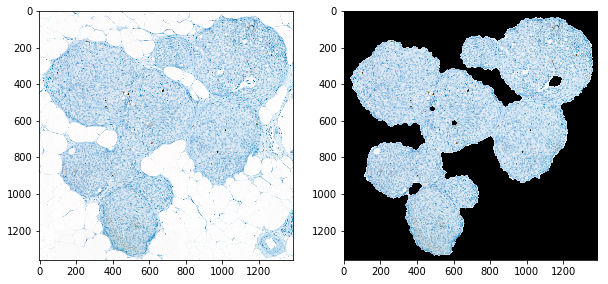

File: ../Data/Ki67-Test/17762-05/base.png
Width: 1360	 Height: 1387


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1886320/1886320 [47:10<00:00, 666.31it/s]


-----------------------------------------------------------------------------------
Time: 3013.0675802230835
-----------------------------------------------------------------------------------
0.125


D:\Anaconda\envs\py35\lib\site-packages\skimage\io\_io.py:141: UserWarning: Images/17762-05_blue_processed_mask.png is a low contrast image
  warn('%s is a low contrast image' % fname)
D:\Anaconda\envs\py35\lib\site-packages\skimage\transform\_warps.py:23: UserWarning: The default multichannel argument (None) is deprecated.  Please specify either True or False explicitly.  multichannel will default to False starting with release 0.16.
  warn('The default multichannel argument (None) is deprecated.  Please '
D:\Anaconda\envs\py35\lib\site-packages\skimage\util\dtype.py:135: UserWarning: Possible precision loss when converting from float64 to uint16
  .format(dtypeobj_in, dtypeobj_out))
D:\Anaconda\envs\py35\lib\site-packages\skimage\io\_io.py:141: UserWarning: Images/17762-05_blue_processed_colored.png is a low contrast image
  warn('%s is a low contrast image' % fname)


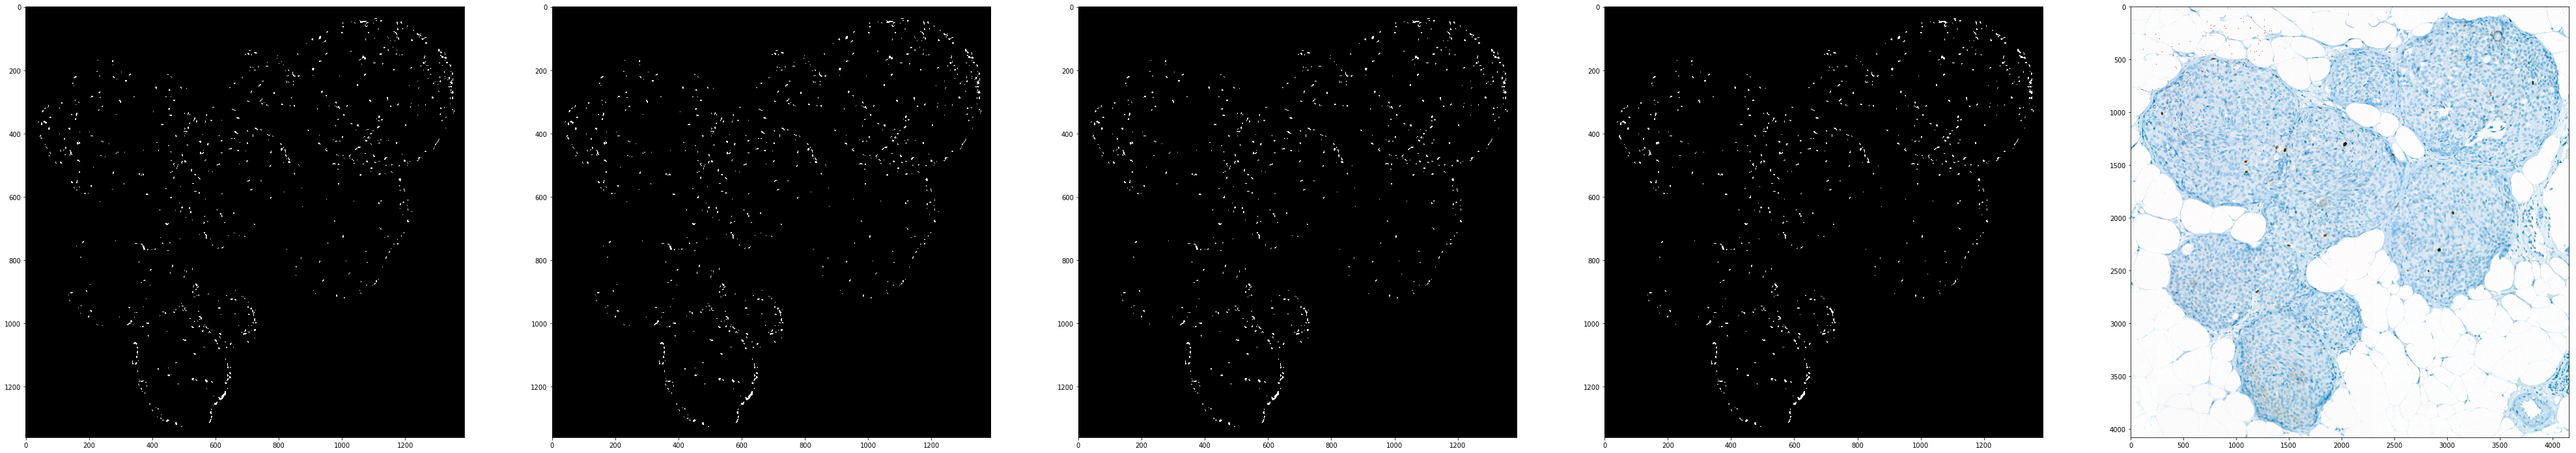

0.125


D:\Anaconda\envs\py35\lib\site-packages\skimage\transform\_warps.py:23: UserWarning: The default multichannel argument (None) is deprecated.  Please specify either True or False explicitly.  multichannel will default to False starting with release 0.16.
  warn('The default multichannel argument (None) is deprecated.  Please '
D:\Anaconda\envs\py35\lib\site-packages\skimage\transform\_warps.py:23: UserWarning: The default multichannel argument (None) is deprecated.  Please specify either True or False explicitly.  multichannel will default to False starting with release 0.16.
  warn('The default multichannel argument (None) is deprecated.  Please '


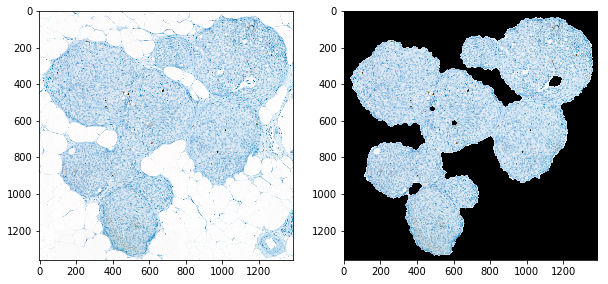

File: ../Data/Ki67-Test/17762-05/base.png
Width: 1360	 Height: 1387


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1886320/1886320 [45:46<00:00, 686.70it/s]


-----------------------------------------------------------------------------------
Time: 2922.8276677131653
-----------------------------------------------------------------------------------
0.7380952380952381


D:\Anaconda\envs\py35\lib\site-packages\skimage\io\_io.py:141: UserWarning: Images/17762-05_brown_processed_mask.png is a low contrast image
  warn('%s is a low contrast image' % fname)
D:\Anaconda\envs\py35\lib\site-packages\skimage\transform\_warps.py:23: UserWarning: The default multichannel argument (None) is deprecated.  Please specify either True or False explicitly.  multichannel will default to False starting with release 0.16.
  warn('The default multichannel argument (None) is deprecated.  Please '
D:\Anaconda\envs\py35\lib\site-packages\skimage\util\dtype.py:135: UserWarning: Possible precision loss when converting from float64 to uint16
  .format(dtypeobj_in, dtypeobj_out))
D:\Anaconda\envs\py35\lib\site-packages\skimage\io\_io.py:141: UserWarning: Images/17762-05_brown_processed_colored.png is a low contrast image
  warn('%s is a low contrast image' % fname)


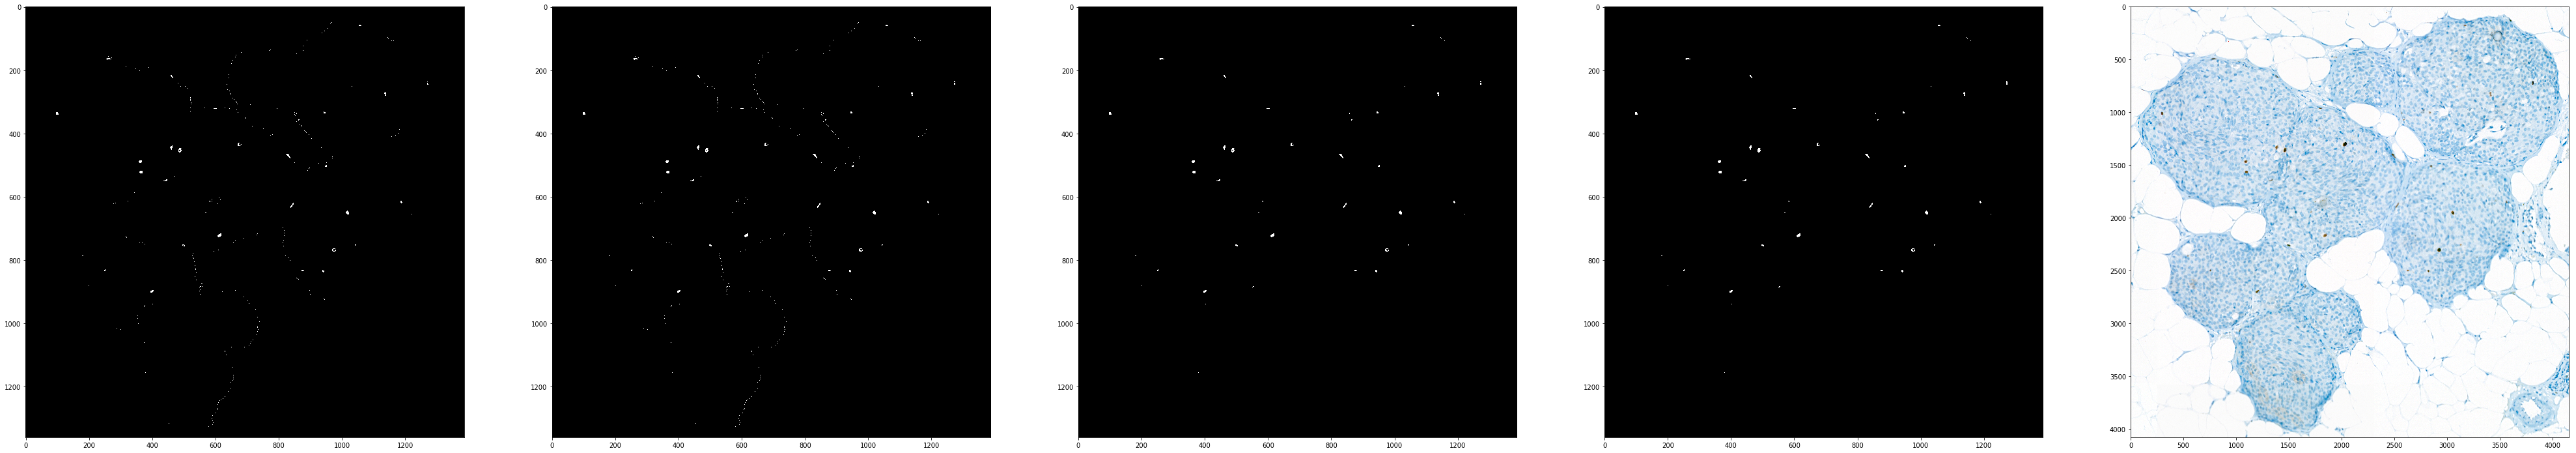

D:\Anaconda\envs\py35\lib\site-packages\skimage\io\_io.py:141: UserWarning: Images/17762-05_brown_processed_labels.png is a low contrast image
  warn('%s is a low contrast image' % fname)


Image Resolution    Pixels Blue Pixels  Blue Recall     Blue Time  \
0   10712-09  2240x2944   6594560        1070     0.429907   1781.064893   
1   10842-05  2112x2768   5846016         881     0.282633    944.083566   
2    1164-03  1504x2112   3176448         723     0.684647    526.004996   
3   11792-09  2192x4416   9679872         534     0.406367   1487.456798   
4   11955-10  3136x2768   8680448         430     0.167442   1364.639630   
5   16247-03  2912x3376   9830912         654     0.405199   1626.677821   
6    1628-05  3744x3776  14137344         807     0.650558   2411.238772   
7   16704-03  2112x3504   7400448        1629     0.255371   1271.850045   
8   17762-05  4080x4160  16972800        4672     0.125000   3013.685602   
9   18583-04  4512x6128  27649536        1490     0.391275   9825.107619   
10  19051-09  1360x1888   2567680        1040     0.301923    483.030239   
11  20232-09  2752x2384   6560768         635     0.455118   1119.293749   
12  20847-09  1728x3328   5750784         290     0.644828    830.343657   
13  22137-04  1584x2384   3776256         264     0.439394    604.770898   
14  22210-10  2784x3104   8641536         683     0.550512   1384.225181   
15  24774-10  2304x1792   4128768         243     0.271605    645.048066   
16  31374-10  2736x4832  13220352        1353     0.322247   2153.690083   
17    503-05  1584x1616   2559744         134     0.664179    354.683446   
18   5563-04  2544x1568   3988992         914     0.535011    742.617996   
19   6143-05  2144x2112   4528128         219     0.228311    769.179822   
20   6645-03  4848x6576  31880448        2402     0.485012  20108.168930   
21   7468-03  1248x2448   3055104        1329     0.348382    552.260868   
22   7983-03  5200x4496  23379200        1030     0.622330  16754.781798   
23   9817-05  1840x1888   3473920         519     0.342967    551.028127   

   Brown Pixels  Brown Recall   Brown Time  Avg. Recall    Total Time  
0           175      0.777143  1126.435360     0.603525   2907.500252  
1           272      0.794118  1230.119378     0.538376   2174.202944  
2            63      0.793651   523.222469     0.739149   1049.227465  
3           126      0.920635  1432.868218     0.663501   2920.325016  
4            70      0.842857  1324.019796     0.505150   2688.659426  
5           348      0.850575  1586.824021     0.627887   3213.501843  
6           195      0.866667  4232.114327     0.758612   6643.353100  
7            21      0.714286  1243.437556     0.484829   2515.287601  
8            42      0.738095  2923.193180     0.431548   5936.878782  
9           348      0.942529  6209.086696     0.666902  16034.194315  
10           82      0.829268   466.999111     0.565596    950.029350  
11          212      0.896226  1109.649096     0.675672   2228.942846  
12           25      0.920000   825.238937     0.782414   1655.582594  
13          114      0.877193   599.253226     0.658293   1204.024124  
14          191      0.937173  1392.498644     0.743843   2776.723825  
15           22      0.954545   642.835713     0.613075   1287.883779  
16          207      0.879227  2614.334425     0.600737   4768.024508  
17           26      1.000000   355.529940     0.832090    710.213386  
18           29      0.655172   694.828278     0.595092   1437.446274  
19           41      0.902439   718.433741     0.565375   1487.613563  
20          179      0.865922  4677.438130     0.675467  24785.607060  
21           59      0.898305   590.001728     0.623344   1142.262596  
22          264      0.840909  3542.948141     0.731620  20297.729939  
23          289      0.930796   587.509226     0.636882   1138.537353

D:\Anaconda\envs\py35\lib\site-packages\skimage\transform\_warps.py:23: UserWarning: The default multichannel argument (None) is deprecated.  Please specify either True or False explicitly.  multichannel will default to False starting with release 0.16.
  warn('The default multichannel argument (None) is deprecated.  Please '
D:\Anaconda\envs\py35\lib\site-packages\skimage\transform\_warps.py:23: UserWarning: The default multichannel argument (None) is deprecated.  Please specify either True or False explicitly.  multichannel will default to False starting with release 0.16.
  warn('The default multichannel argument (None) is deprecated.  Please '


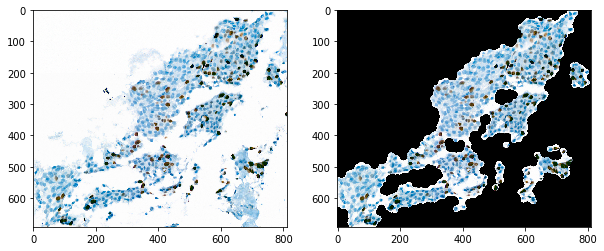

File: ../Data/Ki67-Test/17991-04/base.png
Width: 693	 Height: 811


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 562023/562023 [12:40<00:00, 738.90it/s]


-----------------------------------------------------------------------------------
Time: 810.4367218017578
-----------------------------------------------------------------------------------
0.6933115823817292


D:\Anaconda\envs\py35\lib\site-packages\skimage\transform\_warps.py:23: UserWarning: The default multichannel argument (None) is deprecated.  Please specify either True or False explicitly.  multichannel will default to False starting with release 0.16.
  warn('The default multichannel argument (None) is deprecated.  Please '
D:\Anaconda\envs\py35\lib\site-packages\skimage\util\dtype.py:135: UserWarning: Possible precision loss when converting from float64 to uint16
  .format(dtypeobj_in, dtypeobj_out))


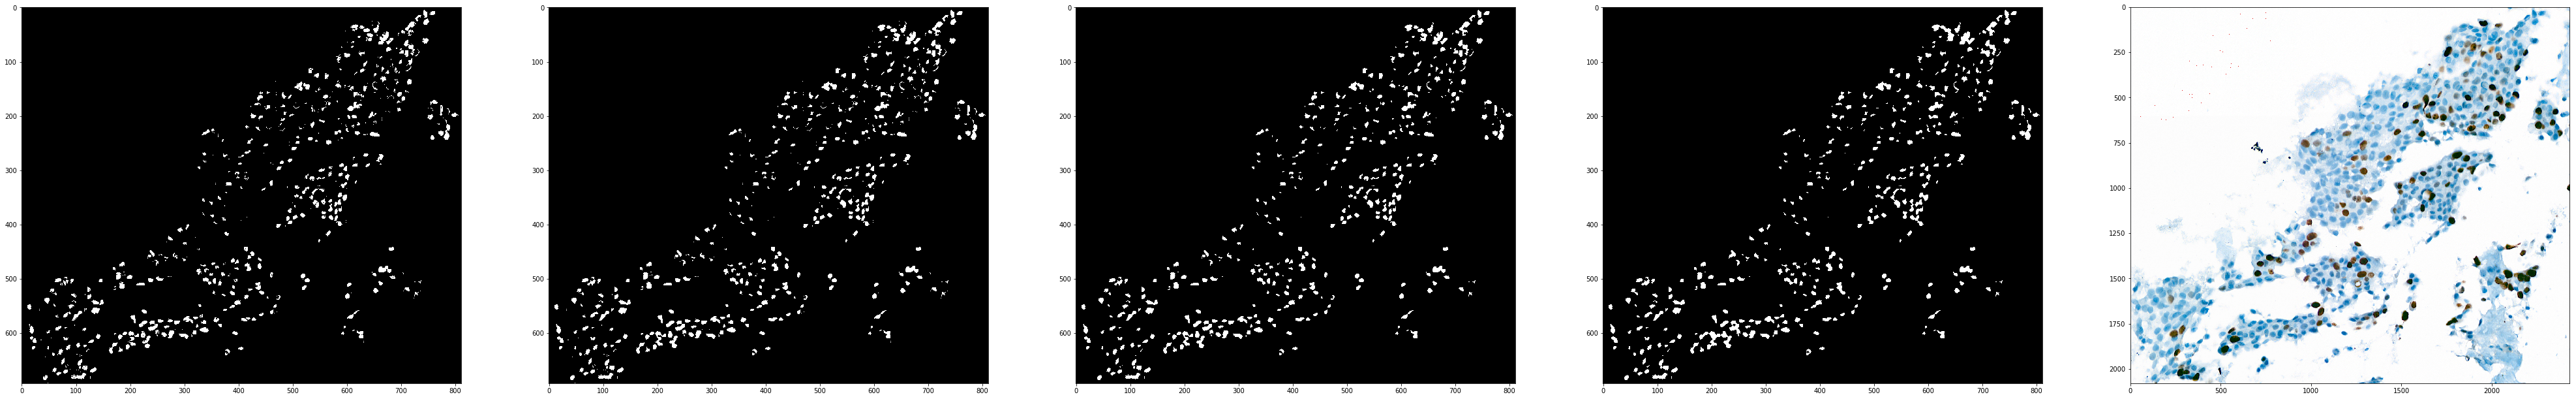

0.6933115823817292


D:\Anaconda\envs\py35\lib\site-packages\skimage\transform\_warps.py:23: UserWarning: The default multichannel argument (None) is deprecated.  Please specify either True or False explicitly.  multichannel will default to False starting with release 0.16.
  warn('The default multichannel argument (None) is deprecated.  Please '
D:\Anaconda\envs\py35\lib\site-packages\skimage\transform\_warps.py:23: UserWarning: The default multichannel argument (None) is deprecated.  Please specify either True or False explicitly.  multichannel will default to False starting with release 0.16.
  warn('The default multichannel argument (None) is deprecated.  Please '


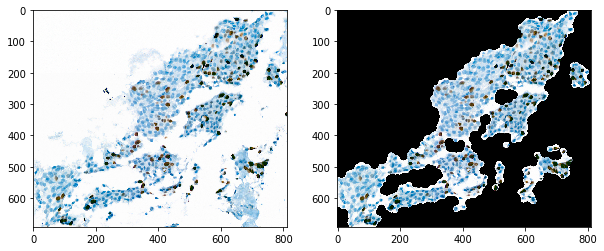

File: ../Data/Ki67-Test/17991-04/base.png
Width: 693	 Height: 811


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 562023/562023 [12:12<00:00, 766.81it/s]


-----------------------------------------------------------------------------------
Time: 782.8508820533752
-----------------------------------------------------------------------------------
0.9476744186046512


D:\Anaconda\envs\py35\lib\site-packages\skimage\transform\_warps.py:23: UserWarning: The default multichannel argument (None) is deprecated.  Please specify either True or False explicitly.  multichannel will default to False starting with release 0.16.
  warn('The default multichannel argument (None) is deprecated.  Please '
D:\Anaconda\envs\py35\lib\site-packages\skimage\util\dtype.py:135: UserWarning: Possible precision loss when converting from float64 to uint16
  .format(dtypeobj_in, dtypeobj_out))


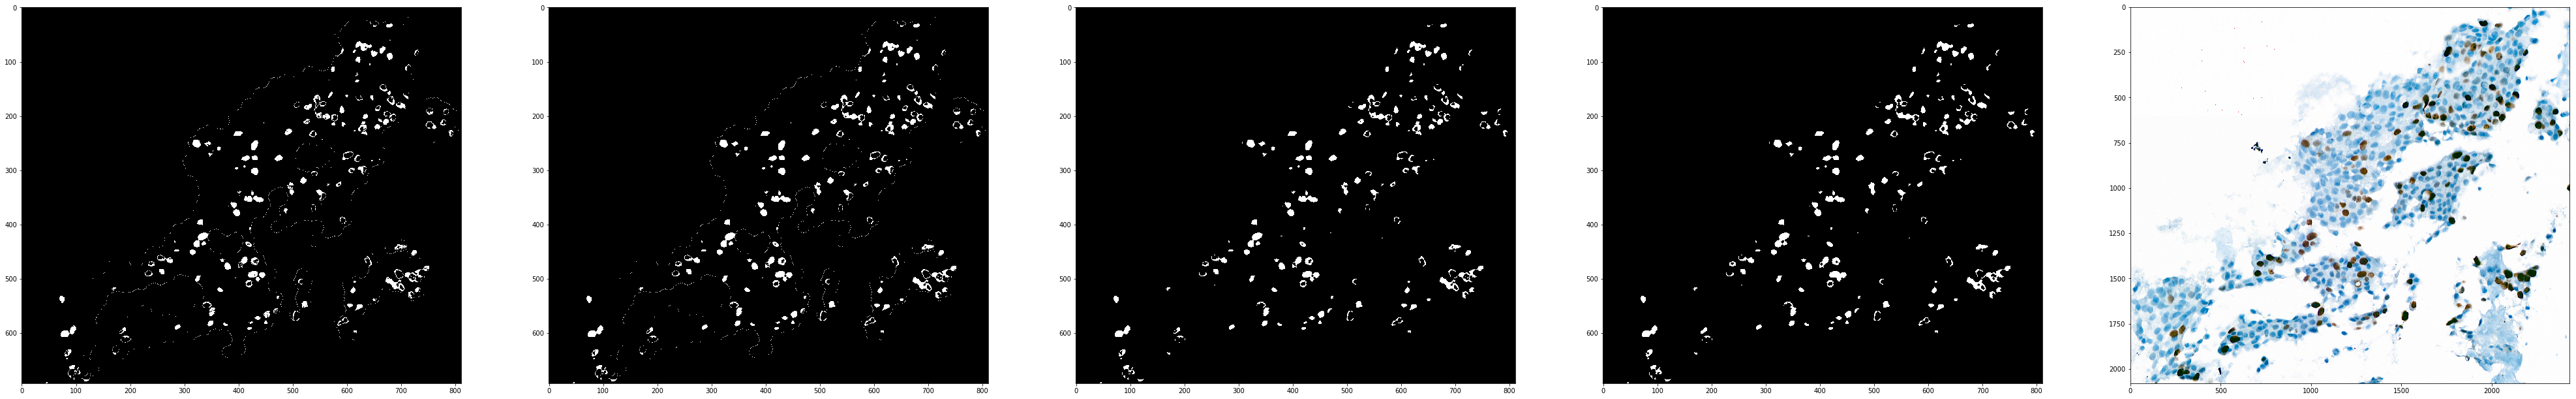

Image Resolution    Pixels Blue Pixels  Blue Recall     Blue Time  \
0   10712-09  2240x2944   6594560        1070     0.429907   1781.064893   
1   10842-05  2112x2768   5846016         881     0.282633    944.083566   
2    1164-03  1504x2112   3176448         723     0.684647    526.004996   
3   11792-09  2192x4416   9679872         534     0.406367   1487.456798   
4   11955-10  3136x2768   8680448         430     0.167442   1364.639630   
5   15959-05  1840x2128   3915520         709     0.380818    654.421394   
6   16247-03  2912x3376   9830912         654     0.405199   1626.677821   
7    1628-05  3744x3776  14137344         807     0.650558   2411.238772   
8   16704-03  2112x3504   7400448        1629     0.255371   1271.850045   
9   17762-05  4080x4160  16972800        4672     0.125000   3013.685602   
10  17991-04  2080x2432   5058560         613     0.693312    810.510724   
11  18583-04  4512x6128  27649536        1490     0.391275   9825.107619   
12  19051-09  1360x1888   2567680        1040     0.301923    483.030239   
13  20232-09  2752x2384   6560768         635     0.455118   1119.293749   
14  20847-09  1728x3328   5750784         290     0.644828    830.343657   
15  22137-04  1584x2384   3776256         264     0.439394    604.770898   
16  22210-10  2784x3104   8641536         683     0.550512   1384.225181   
17  23805-03  2528x3152   7968256         727     0.232462   1233.650193   
18  24774-10  2304x1792   4128768         243     0.271605    645.048066   
19  31374-10  2736x4832  13220352        1353     0.322247   2153.690083   
20    503-05  1584x1616   2559744         134     0.664179    354.683446   
21   5563-04  2544x1568   3988992         914     0.535011    742.617996   
22   6143-05  2144x2112   4528128         219     0.228311    769.179822   
23   6645-03  4848x6576  31880448        2402     0.485012  20108.168930   
24   7468-03  1248x2448   3055104        1329     0.348382    552.260868   
25   7983-03  5200x4496  23379200        1030     0.622330  16754.781798   
26   9817-05  1840x1888   3473920         519     0.342967    551.028127   

   Brown Pixels  Brown Recall   Brown Time  Avg. Recall    Total Time  
0           175      0.777143  1126.435360     0.603525   2907.500252  
1           272      0.794118  1230.119378     0.538376   2174.202944  
2            63      0.793651   523.222469     0.739149   1049.227465  
3           126      0.920635  1432.868218     0.663501   2920.325016  
4            70      0.842857  1324.019796     0.505150   2688.659426  
5           186      0.951613   637.416920     0.666215   1291.838314  
6           348      0.850575  1586.824021     0.627887   3213.501843  
7           195      0.866667  4232.114327     0.758612   6643.353100  
8            21      0.714286  1243.437556     0.484829   2515.287601  
9            42      0.738095  2923.193180     0.431548   5936.878782  
10          172      0.947674   782.920883     0.820493   1593.431607  
11          348      0.942529  6209.086696     0.666902  16034.194315  
12           82      0.829268   466.999111     0.565596    950.029350  
13          212      0.896226  1109.649096     0.675672   2228.942846  
14           25      0.920000   825.238937     0.782414   1655.582594  
15          114      0.877193   599.253226     0.658293   1204.024124  
16          191      0.937173  1392.498644     0.743843   2776.723825  
17          545      0.873394  1222.973747     0.552928   2456.623941  
18           22      0.954545   642.835713     0.613075   1287.883779  
19          207      0.879227  2614.334425     0.600737   4768.024508  
20           26      1.000000   355.529940     0.832090    710.213386  
21           29      0.655172   694.828278     0.595092   1437.446274  
22           41      0.902439   718.433741     0.565375   1487.613563  
23          179      0.865922  4677.438130     0.675467  24785.607060  
24           59      0.898305   590.001728     0.623344   1142.262596  
25    

D:\Anaconda\envs\py35\lib\site-packages\skimage\transform\_warps.py:23: UserWarning: The default multichannel argument (None) is deprecated.  Please specify either True or False explicitly.  multichannel will default to False starting with release 0.16.
  warn('The default multichannel argument (None) is deprecated.  Please '
D:\Anaconda\envs\py35\lib\site-packages\skimage\transform\_warps.py:23: UserWarning: The default multichannel argument (None) is deprecated.  Please specify either True or False explicitly.  multichannel will default to False starting with release 0.16.
  warn('The default multichannel argument (None) is deprecated.  Please '


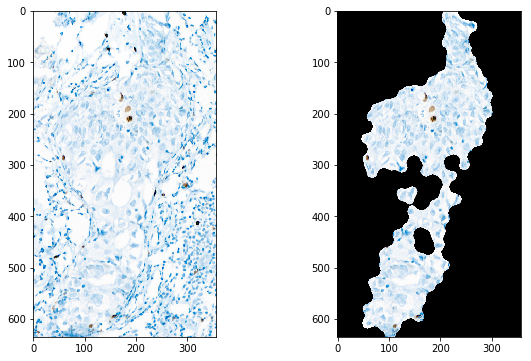

File: ../Data/Ki67-Test/17993-04/base.png
Width: 635	 Height: 357


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 226695/226695 [04:51<00:00, 778.89it/s]


-----------------------------------------------------------------------------------
Time: 311.16469383239746
-----------------------------------------------------------------------------------
0.06880733944954129


D:\Anaconda\envs\py35\lib\site-packages\skimage\io\_io.py:141: UserWarning: Images/17993-04_blue_processed_mask.png is a low contrast image
  warn('%s is a low contrast image' % fname)
D:\Anaconda\envs\py35\lib\site-packages\skimage\transform\_warps.py:23: UserWarning: The default multichannel argument (None) is deprecated.  Please specify either True or False explicitly.  multichannel will default to False starting with release 0.16.
  warn('The default multichannel argument (None) is deprecated.  Please '
D:\Anaconda\envs\py35\lib\site-packages\skimage\util\dtype.py:135: UserWarning: Possible precision loss when converting from float64 to uint16
  .format(dtypeobj_in, dtypeobj_out))
D:\Anaconda\envs\py35\lib\site-packages\skimage\io\_io.py:141: UserWarning: Images/17993-04_blue_processed_colored.png is a low contrast image
  warn('%s is a low contrast image' % fname)


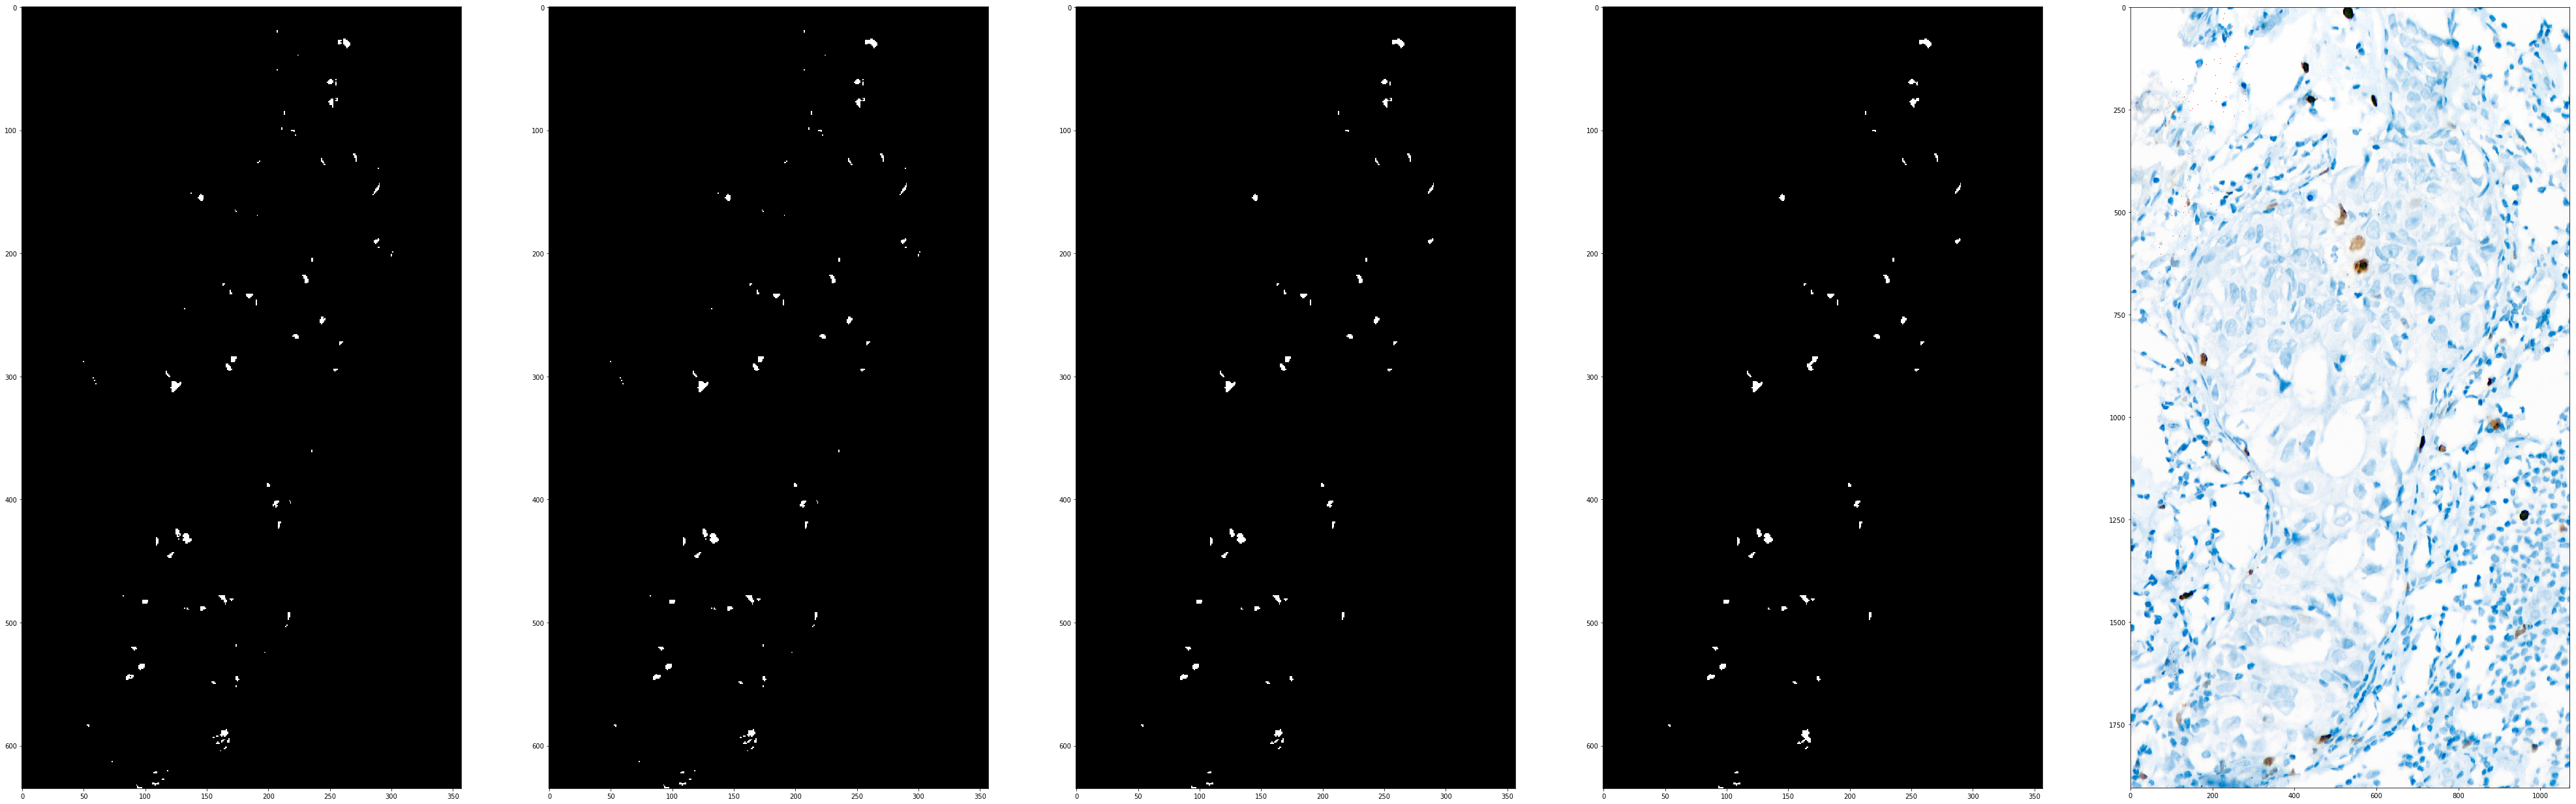

0.06880733944954129


D:\Anaconda\envs\py35\lib\site-packages\skimage\transform\_warps.py:23: UserWarning: The default multichannel argument (None) is deprecated.  Please specify either True or False explicitly.  multichannel will default to False starting with release 0.16.
  warn('The default multichannel argument (None) is deprecated.  Please '
D:\Anaconda\envs\py35\lib\site-packages\skimage\transform\_warps.py:23: UserWarning: The default multichannel argument (None) is deprecated.  Please specify either True or False explicitly.  multichannel will default to False starting with release 0.16.
  warn('The default multichannel argument (None) is deprecated.  Please '


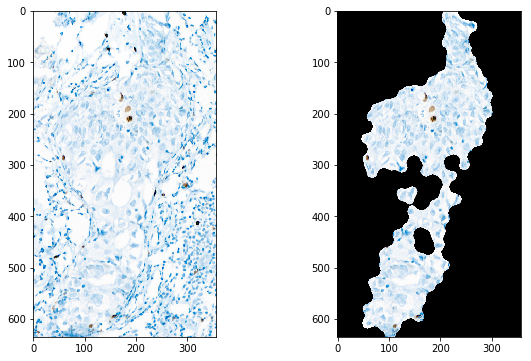

File: ../Data/Ki67-Test/17993-04/base.png
Width: 635	 Height: 357


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 226695/226695 [04:47<00:00, 788.51it/s]


-----------------------------------------------------------------------------------
Time: 308.0480456352234
-----------------------------------------------------------------------------------
0.8571428571428571


D:\Anaconda\envs\py35\lib\site-packages\skimage\io\_io.py:141: UserWarning: Images/17993-04_brown_processed_mask.png is a low contrast image
  warn('%s is a low contrast image' % fname)
D:\Anaconda\envs\py35\lib\site-packages\skimage\transform\_warps.py:23: UserWarning: The default multichannel argument (None) is deprecated.  Please specify either True or False explicitly.  multichannel will default to False starting with release 0.16.
  warn('The default multichannel argument (None) is deprecated.  Please '
D:\Anaconda\envs\py35\lib\site-packages\skimage\util\dtype.py:135: UserWarning: Possible precision loss when converting from float64 to uint16
  .format(dtypeobj_in, dtypeobj_out))
D:\Anaconda\envs\py35\lib\site-packages\skimage\io\_io.py:141: UserWarning: Images/17993-04_brown_processed_colored.png is a low contrast image
  warn('%s is a low contrast image' % fname)


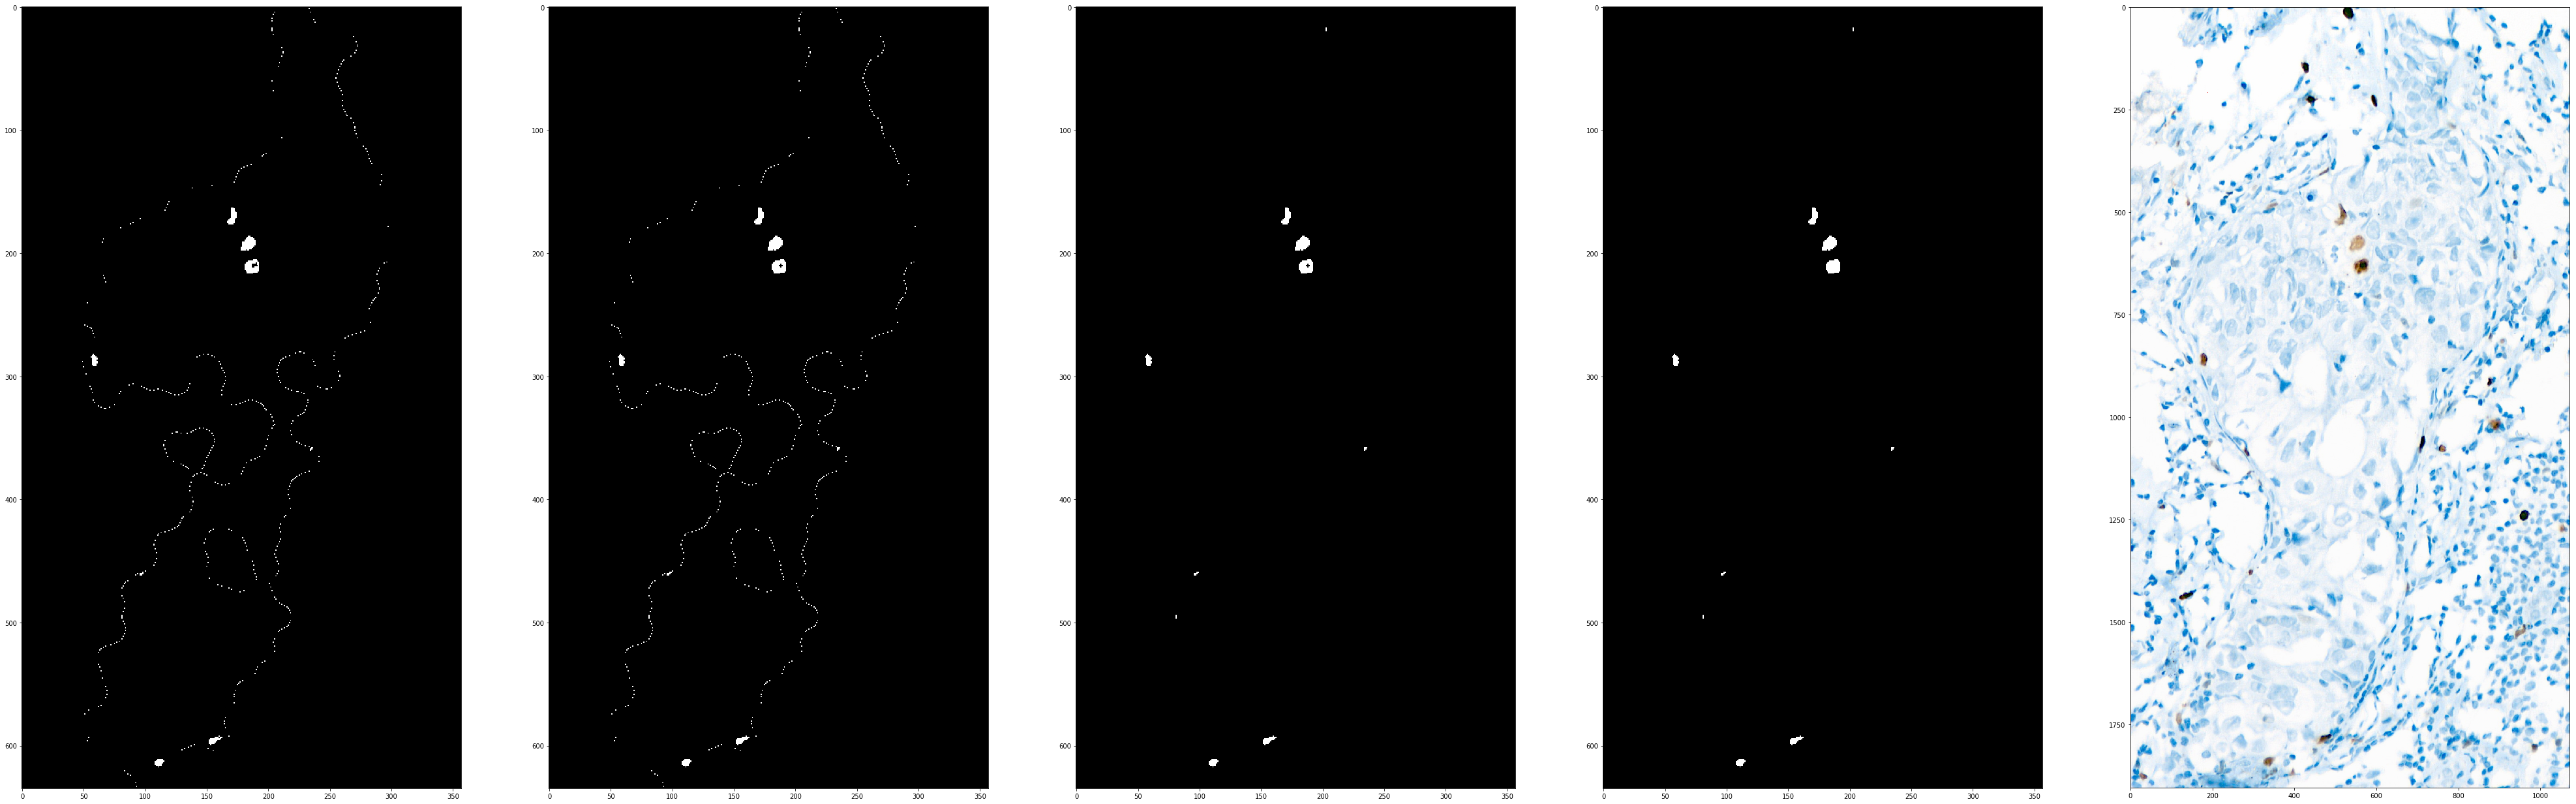

D:\Anaconda\envs\py35\lib\site-packages\skimage\io\_io.py:141: UserWarning: Images/17993-04_brown_processed_labels.png is a low contrast image
  warn('%s is a low contrast image' % fname)


Image Resolution    Pixels Blue Pixels  Blue Recall     Blue Time  \
0   10712-09  2240x2944   6594560        1070     0.429907   1781.064893   
1   10842-05  2112x2768   5846016         881     0.282633    944.083566   
2    1164-03  1504x2112   3176448         723     0.684647    526.004996   
3   11792-09  2192x4416   9679872         534     0.406367   1487.456798   
4   11955-10  3136x2768   8680448         430     0.167442   1364.639630   
5   15959-05  1840x2128   3915520         709     0.380818    654.421394   
6   16247-03  2912x3376   9830912         654     0.405199   1626.677821   
7    1628-05  3744x3776  14137344         807     0.650558   2411.238772   
8   16704-03  2112x3504   7400448        1629     0.255371   1271.850045   
9   17554-10  2448x2416   5914368         944     0.429025    923.512409   
10  17762-05  4080x4160  16972800        4672     0.125000   3013.685602   
11  17991-04  2080x2432   5058560         613     0.693312    810.510724   
12  17993-04  1904x1072   2041088         218     0.068807    311.202194   
13  18583-04  4512x6128  27649536        1490     0.391275   9825.107619   
14  19051-09  1360x1888   2567680        1040     0.301923    483.030239   
15  20232-09  2752x2384   6560768         635     0.455118   1119.293749   
16  20847-09  1728x3328   5750784         290     0.644828    830.343657   
17  22137-04  1584x2384   3776256         264     0.439394    604.770898   
18  22210-10  2784x3104   8641536         683     0.550512   1384.225181   
19  23805-03  2528x3152   7968256         727     0.232462   1233.650193   
20  24774-10  2304x1792   4128768         243     0.271605    645.048066   
21  31374-10  2736x4832  13220352        1353     0.322247   2153.690083   
22    503-05  1584x1616   2559744         134     0.664179    354.683446   
23   5563-04  2544x1568   3988992         914     0.535011    742.617996   
24   6143-05  2144x2112   4528128         219     0.228311    769.179822   
25   6645-03  4848x6576  31880448        2402     0.485012  20108.168930   
26   7468-03  1248x2448   3055104        1329     0.348382    552.260868   
27   7983-03  5200x4496  23379200        1030     0.622330  16754.781798   
28   9817-05  1840x1888   3473920         519     0.342967    551.028127   

   Brown Pixels  Brown Recall   Brown Time  Avg. Recall    Total Time  
0           175      0.777143  1126.435360     0.603525   2907.500252  
1           272      0.794118  1230.119378     0.538376   2174.202944  
2            63      0.793651   523.222469     0.739149   1049.227465  
3           126      0.920635  1432.868218     0.663501   2920.325016  
4            70      0.842857  1324.019796     0.505150   2688.659426  
5           186      0.951613   637.416920     0.666215   1291.838314  
6           348      0.850575  1586.824021     0.627887   3213.501843  
7           195      0.866667  4232.114327     0.758612   6643.353100  
8            21      0.714286  1243.437556     0.484829   2515.287601  
9             7      0.857143   886.423745     0.643084   1809.936154  
10           42      0.738095  2923.193180     0.431548   5936.878782  
11          172      0.947674   782.920883     0.820493   1593.431607  
12            7      0.857143   308.083046     0.462975    619.285241  
13          348      0.942529  6209.086696     0.666902  16034.194315  
14           82      0.829268   466.999111     0.565596    950.029350  
15          212      0.896226  1109.649096     0.675672   2228.942846  
16           25      0.920000   825.238937     0.782414   1655.582594  
17          114      0.877193   599.253226     0.658293   1204.024124  
18          191      0.937173  1392.498644     0.743843   2776.723825  
19          545      0.873394  1222.973747     0.552928   2456.623941  
20           22      0.954545   642.835713     0.613075   1287.883779  
21          207      0.879227  2614.334425     0.600737   4768.024508  
22           26      1.000000   355.529940     0.832090    710.213386 

In [6]:
helper = Helper()
import time
from Settings.SettingsKi67 import Settings as Settings
import Settings.GeneralSettings as generalSettings

for name in ["17762-05", "17991-04", "17993-04"]:
    generalSettings.file_name = name
    generalSettings.class_1 = "blue"
    settings = Settings(generalSettings)

    loadImage = LoadImage()
    samples_stats, train_stats, test_stats, train_samples = loadImage.worker(settings, test_mode = True)

    ki67Test = Ki67(settings, settings.s_function_width, False)
    start = time.time()
    ki67Test.noOptymalizationWorker(settings)
    end = time.time()
    blue_time = end - start
    blue_recall, markers_number_blue = validateResults(settings.file_name, True)
    print(blue_recall)
    generalSettings.class_1 = "brown"
    settings = Settings(generalSettings)

    loadImage = LoadImage()
    samples_stats, train_stats, test_stats, train_samples = loadImage.worker(settings, test_mode = True)

    ki67Test = Ki67(settings, settings.s_function_width, False)
    start = time.time()
    ki67Test.noOptymalizationWorker(settings)
    end = time.time()
    brown_time = end - start

    brown_recall, markers_number_brown = validateResults(settings.file_name, True)
    
    base_res = io.imread(settings.data_folder_test + settings.file_name + "/base.png")
    helper.saveKi67Segmentation([settings.file_name, str(base_res.shape[0]) + "x" + str(base_res.shape[1]), base_res.shape[0] * base_res.shape[1], markers_number_blue, blue_recall, blue_time, markers_number_brown, brown_recall, brown_time, (blue_recall + brown_recall)/2, (blue_time + brown_time)])